In [5]:
import numpy as np
import pandas as pd
import sklearn 
import datetime
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy as scipy
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
sklearn.__version__

'0.21.2'

In [7]:
pd.__version__

'1.0.5'

In [2]:
CGM_df = pd.read_csv('CGMData.csv')
Insulin_df = pd.read_csv('InsulinData.csv')

CGM_df.head()

/home/tasneem/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/tasneem/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (13,43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Index,Date,Time,New Device Time,BG Reading (mg/dL),Linked BG Meter ID,Basal Rate (U/h),Temp Basal Amount,Temp Basal Type,Temp Basal Duration (h:mm:ss),...,Scroll Step Size,Insulin Action Curve Time,Sensor Calibration Rejected Reason,Preset Bolus,Bolus Source,Network Device Associated Reason,Network Device Disassociated Reason,Network Device Disconnected Reason,Sensor Exception,Preset Temp Basal Name
0,20355,2/12/2018,13:22:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20356,2/12/2018,13:17:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20357,2/12/2018,13:12:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SENSOR_ERROR,NaN
3,20358,2/12/2018,13:07:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SENSOR_ERROR,NaN
4,20359,2/12/2018,13:02:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SENSOR_ERROR,NaN


In [3]:
#Adding DataTime index , sorting the data in sending order and selecting colomns I am going to use


CGM_df_a = CGM_df[['Index', 'Date', 'Time','Sensor Glucose (mg/dL)' ]]
#CGM_df_a.head()


CGM_df_a['DateTime'] = pd.to_datetime(CGM_df_a['Date']+" "+CGM_df_a['Time'])
#CGM_df_a.head()
CGM_df_a['DateTime'] =pd.DatetimeIndex(CGM_df_a['DateTime'])
CGM_df_a.set_index(['DateTime'])
#CGM_df_a.info()
#CGM_df_a.head()
CGM_df_sort = CGM_df_a.sort_values('DateTime', ascending=True)
#CGM_df_sort.head()

my_CGM_df= CGM_df_sort[['DateTime', 'Date', 'Time' , 'Sensor Glucose (mg/dL)']]
my_CGM_df

/home/tasneem/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/tasneem/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,DateTime,Date,Time,Sensor Glucose (mg/dL)
55342,2017-07-25 12:08:54,7/25/2017,12:08:54,314.0
55341,2017-07-25 12:13:54,7/25/2017,12:13:54,310.0
55340,2017-07-25 12:18:54,7/25/2017,12:18:54,309.0
55339,2017-07-25 12:23:54,7/25/2017,12:23:54,311.0
55338,2017-07-25 12:28:54,7/25/2017,12:28:54,311.0
...,...,...,...,...
4,2018-02-12 13:02:27,2/12/2018,13:02:27,NaN
3,2018-02-12 13:07:27,2/12/2018,13:07:27,NaN
2,2018-02-12 13:12:27,2/12/2018,13:12:27,NaN
1,2018-02-12 13:17:27,2/12/2018,13:17:27,122.0


In [8]:
Insulin_df_a = Insulin_df[['Index', 'Date', 'Time','BWZ Carb Input (grams)' ]]
Insulin_df_a.head()


,Index,Date,Time,BWZ Carb Input (grams)
0,0,2/12/2018,13:20:53,NaN
1,1,2/12/2018,13:20:48,NaN
2,2,2/12/2018,13:18:48,NaN
3,3,2/12/2018,13:18:48,NaN
4,4,2/12/2018,13:12:33,NaN


In [4]:

#Making a data frame with meal data only
Insulin_df_a['DateTime'] = pd.to_datetime(Insulin_df_a['Date']+" "+Insulin_df_a['Time'])
Insulin_df_a['DateTime'] =pd.DatetimeIndex(Insulin_df_a['DateTime'])
Insulin_df_a.set_index(['DateTime'])
Insulin_df_sort = Insulin_df_a.sort_values('DateTime', ascending=True)
#Insulin_df_a.info()
#Insulin_df_a.head()
#Insulin_df_sort.info()
#Insulin_df_sort.head()
my_Insulin_df= Insulin_df_sort[['DateTime', 'Date', 'Time','BWZ Carb Input (grams)' ]]
#my_Insulin_df

#Selecting the meal carbs 

MealMatrix_df=my_Insulin_df.loc[(~my_Insulin_df['BWZ Carb Input (grams)'].isnull()) & (my_Insulin_df['BWZ Carb Input (grams)'] > 0) ]
#MealMatrix_df

MealMatrix_df['Diff'] = MealMatrix_df['DateTime'].diff( periods = 1) 

MealMatrix_df['shifted'] = MealMatrix_df['Diff'].shift(1)

my_meal= MealMatrix_df.loc[(MealMatrix_df['shifted'] > datetime.timedelta (minutes=120)) | (pd.isnull(MealMatrix_df['shifted']))]



#Bining the data for clustring purpos
min_carb= my_meal['BWZ Carb Input (grams)'].min()
min_carb
max_carb= my_meal['BWZ Carb Input (grams)'].max()
max_carb
bins = [3.0, 23.0, 43.0, 63.0, 83.0, 103.0, 129.0]
labels = [0,1,2,3,4,5]
my_meal['BWZ Carb Input (grams)']
my_meal['Meal_label']= pd.cut(my_meal['BWZ Carb Input (grams)'], bins, labels= labels)


ground_truth = my_meal
ground_truth



/home/tasneem/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/tasneem/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/tasneem/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,DateTime,Date,Time,BWZ Carb Input (grams),Diff,shifted,Meal_label
41401,2017-07-25 10:21:19,7/25/2017,10:21:19,91.0,NaT,NaT,4
41393,2017-07-25 10:39:46,7/25/2017,10:39:46,58.0,00:18:27,NaT,2
41274,2017-07-26 09:27:16,7/26/2017,9:27:16,72.0,14:55:36,07:51:54,3
41265,2017-07-26 11:24:52,7/26/2017,11:24:52,20.0,01:57:36,14:55:36,0
41172,2017-07-27 05:45:51,7/27/2017,5:45:51,24.0,10:30:45,06:26:25,1
...,...,...,...,...,...,...,...
261,2018-02-11 12:43:23,2/11/2018,12:43:23,27.0,02:41:04,14:15:51,1
235,2018-02-11 15:34:26,2/11/2018,15:34:26,9.0,02:51:03,02:41:04,0
222,2018-02-11 16:27:04,2/11/2018,16:27:04,40.0,00:52:38,02:51:03,1
129,2018-02-12 02:30:55,2/12/2018,2:30:55,15.0,05:57:37,02:18:41,0


In [9]:
#meal_df = meal_df.loc[::-1,:]
my_matrix = [[0 for c in range(30)] for r in range(len(my_meal))]

for i in range(len(my_meal)):
    startMeal = my_meal['DateTime'].iloc[i] - datetime.timedelta (minutes=30)
    endMeal = startMeal +  datetime.timedelta (hours = 2.5)
    theMeal = my_CGM_df.loc[(my_CGM_df['DateTime'] > startMeal) & (my_CGM_df['DateTime'] <= endMeal)][['DateTime', 'Sensor Glucose (mg/dL)']]
    for j in range(len(theMeal)) :
        my_matrix[i][j] = (theMeal['Sensor Glucose (mg/dL)'].iloc[j])
        

        
#meal_df = meal_df.loc[::-1,:]
mealresult = pd.DataFrame(my_matrix)

#mealresult = mealresult.dropna()
#mealresult['lable'] = 1
mealresult

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,314.0,310.0,309.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,314.0,310.0,309.0,311.0,311.0,311.0,312.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,198.0,197.0,197.0,197.0,199.0,200.0,199.0,200.0,203.0,211.0,...,318.0,321.0,327.0,326.0,328.0,326.0,324.0,327.0,339.0,350.0
3,328.0,326.0,324.0,327.0,339.0,350.0,362.0,368.0,366.0,357.0,...,259.0,255.0,248.0,241.0,231.0,220.0,222.0,222.0,222.0,223.0
4,212.0,210.0,204.0,200.0,199.0,201.0,201.0,194.0,188.0,183.0,...,210.0,213.0,212.0,216.0,213.0,210.0,210.0,209.0,210.0,209.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,209.0,219.0,221.0,221.0,216.0,217.0,215.0,211.0,201.0,200.0,...,180.0,184.0,180.0,190.0,196.0,203.0,206.0,212.0,215.0,208.0
600,206.0,203.0,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
602,89.0,80.0,69.0,60.0,51.0,52.0,41.0,41.0,46.0,46.0,...,113.0,105.0,98.0,87.0,80.0,84.0,86.0,92.0,93.0,NaN


In [10]:
#Selecting feautures


min = mealresult.min(axis=1)
max = mealresult.max(axis=1)
sum = mealresult.sum(axis=1)
mean = mealresult.mean(axis=1)

mealresult['min']= min
mealresult['max']=max
mealresult['total']=sum
mealresult['max-min']=mealresult['max'] - mealresult['min']
mealresult['mean'] = mean
mealresult['norm'] = mealresult['total']/mealresult['min']
mealresult['norm2'] = mealresult['max-min']/mealresult['min']

#mealresult_GT= ground_truth
mealresult['mlabel']= ground_truth['Meal_label'].values
mealresult

,0,1,2,3,4,5,6,7,8,9,...,28,29,min,max,total,max-min,mean,norm,norm2,mlabel
0,314.0,310.0,309.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,314.0,933.0,314.0,31.100000,inf,inf,4
1,314.0,310.0,309.0,311.0,311.0,311.0,312.0,0.0,0.0,0.0,...,0.0,0.0,0.0,314.0,2178.0,314.0,72.600000,inf,inf,2
2,198.0,197.0,197.0,197.0,199.0,200.0,199.0,200.0,203.0,211.0,...,339.0,350.0,197.0,350.0,8049.0,153.0,268.300000,40.857868,0.776650,3
3,328.0,326.0,324.0,327.0,339.0,350.0,362.0,368.0,366.0,357.0,...,222.0,223.0,220.0,368.0,8944.0,148.0,298.133333,40.654545,0.672727,0
4,212.0,210.0,204.0,200.0,199.0,201.0,201.0,194.0,188.0,183.0,...,210.0,209.0,168.0,216.0,5919.0,48.0,197.300000,35.232143,0.285714,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,209.0,219.0,221.0,221.0,216.0,217.0,215.0,211.0,201.0,200.0,...,215.0,208.0,177.0,221.0,6081.0,44.0,202.700000,34.355932,0.248588,1
600,206.0,203.0,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,206.0,614.0,206.0,153.500000,inf,inf,0
601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1
602,89.0,80.0,69.0,60.0,51.0,52.0,41.0,41.0,46.0,46.0,...,93.0,NaN,41.0,129.0,2331.0,88.0,80.379310,56.853659,2.146341,0


In [11]:
#Dealing with missing values

mealresult=mealresult.dropna()
mealresult.replace([np.inf, -np.inf], np.nan, inplace=True) 
mealresult=mealresult.dropna()
mealresult

/home/tasneem/.local/lib/python3.6/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,0,1,2,3,4,5,6,7,8,9,...,28,29,min,max,total,max-min,mean,norm,norm2,mlabel
2,198.0,197.0,197.0,197.0,199.0,200.0,199.0,200.0,203.0,211.0,...,339.0,350.0,197.0,350.0,8049.0,153.0,268.300000,40.857868,0.776650,3
3,328.0,326.0,324.0,327.0,339.0,350.0,362.0,368.0,366.0,357.0,...,222.0,223.0,220.0,368.0,8944.0,148.0,298.133333,40.654545,0.672727,0
4,212.0,210.0,204.0,200.0,199.0,201.0,201.0,194.0,188.0,183.0,...,210.0,209.0,168.0,216.0,5919.0,48.0,197.300000,35.232143,0.285714,1
5,145.0,141.0,137.0,133.0,129.0,124.0,125.0,122.0,123.0,130.0,...,153.0,152.0,122.0,213.0,4970.0,91.0,165.666667,40.737705,0.745902,2
6,40.0,40.0,46.0,53.0,57.0,57.0,55.0,58.0,70.0,77.0,...,198.0,200.0,40.0,200.0,3425.0,160.0,114.166667,85.625000,4.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,149.0,150.0,154.0,158.0,162.0,159.0,156.0,148.0,146.0,150.0,...,232.0,242.0,146.0,252.0,5601.0,106.0,186.700000,38.363014,0.726027,4
597,61.0,59.0,59.0,60.0,65.0,70.0,82.0,100.0,126.0,133.0,...,114.0,106.0,59.0,169.0,3480.0,110.0,116.000000,58.983051,1.864407,1
598,57.0,58.0,62.0,74.0,104.0,110.0,126.0,133.0,135.0,141.0,...,197.0,202.0,57.0,209.0,4366.0,152.0,145.533333,76.596491,2.666667,0
599,209.0,219.0,221.0,221.0,216.0,217.0,215.0,211.0,201.0,200.0,...,215.0,208.0,177.0,221.0,6081.0,44.0,202.700000,34.355932,0.248588,1


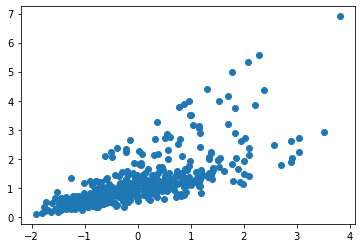

In [15]:
#KMeans clustring with StandardScaler 

stscaler = StandardScaler()
stscaler.fit(mealresult[['max-min']])
mealresult['max-min'] = stscaler.transform(mealresult[['max-min']])

plt.scatter(mealresult['max-min'], mealresult['norm2'])
#plt.xlabel(mealresult[0])
#plt.ylabel(mealresult)





In [16]:
x = np.asarray(mealresult['max-min'])
y = np.asarray(mealresult['norm2'])



km = KMeans(n_clusters=6)
y_predicted = km.fit_predict(x.reshape(-1, 1), y)
y_predicted

array([0, 0, 3, 1, 0, 5, 5, 0, 1, 3, 5, 1, 1, 5, 5, 3, 1, 5, 0, 3, 1, 0,
       1, 0, 0, 3, 4, 4, 1, 5, 4, 0, 0, 1, 1, 3, 3, 1, 5, 1, 0, 1, 0, 0,
       1, 3, 5, 0, 1, 5, 5, 0, 1, 3, 3, 1, 1, 0, 5, 3, 1, 1, 2, 3, 5, 4,
       4, 4, 3, 5, 3, 1, 5, 0, 3, 4, 5, 5, 2, 0, 5, 5, 4, 1, 3, 1, 1, 1,
       1, 0, 0, 4, 1, 0, 1, 0, 0, 4, 5, 2, 4, 5, 3, 5, 5, 3, 5, 3, 0, 0,
       0, 5, 3, 0, 1, 3, 4, 1, 4, 1, 1, 1, 5, 3, 1, 1, 3, 5, 4, 5, 1, 4,
       5, 5, 1, 3, 5, 5, 5, 3, 3, 5, 4, 5, 1, 3, 3, 5, 5, 3, 0, 5, 0, 4,
       5, 3, 5, 1, 4, 1, 0, 4, 2, 3, 0, 0, 5, 0, 3, 3, 3, 4, 5, 5, 5, 2,
       1, 0, 5, 1, 1, 0, 5, 3, 3, 4, 0, 3, 0, 4, 1, 0, 5, 5, 4, 4, 5, 4,
       5, 3, 0, 4, 4, 0, 4, 1, 5, 5, 4, 5, 5, 4, 4, 1, 3, 5, 3, 5, 1, 3,
       3, 1, 4, 3, 0, 1, 3, 1, 1, 5, 1, 0, 5, 3, 3, 3, 5, 4, 0, 1, 3, 1,
       1, 3, 3, 0, 1, 0, 5, 1, 4, 0, 1, 0, 1, 5, 5, 5, 5, 3, 1, 3, 3, 3,
       0, 1, 1, 1, 1, 1, 4, 5, 0, 5, 5, 1, 5, 1, 0, 3, 3, 1, 3, 5, 1, 5,
       5, 5, 1, 3, 1, 1, 0, 3, 5, 1, 3, 1, 3, 3, 0,

In [17]:
mealresult['Kmeans']=y_predicted
mealresult

,0,1,2,3,4,5,6,7,8,9,...,29,min,max,total,max-min,mean,norm,norm2,mlabel,Kmeans
2,198.0,197.0,197.0,197.0,199.0,200.0,199.0,200.0,203.0,211.0,...,350.0,197.0,350.0,8049.0,0.824458,268.300000,40.857868,0.776650,3,0
3,328.0,326.0,324.0,327.0,339.0,350.0,362.0,368.0,366.0,357.0,...,223.0,220.0,368.0,8944.0,0.720496,298.133333,40.654545,0.672727,0,0
4,212.0,210.0,204.0,200.0,199.0,201.0,201.0,194.0,188.0,183.0,...,209.0,168.0,216.0,5919.0,-1.358739,197.300000,35.232143,0.285714,1,3
5,145.0,141.0,137.0,133.0,129.0,124.0,125.0,122.0,123.0,130.0,...,152.0,122.0,213.0,4970.0,-0.464668,165.666667,40.737705,0.745902,2,1
6,40.0,40.0,46.0,53.0,57.0,57.0,55.0,58.0,70.0,77.0,...,200.0,40.0,200.0,3425.0,0.970005,114.166667,85.625000,4.000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,149.0,150.0,154.0,158.0,162.0,159.0,156.0,148.0,146.0,150.0,...,242.0,146.0,252.0,5601.0,-0.152783,186.700000,38.363014,0.726027,4,5
597,61.0,59.0,59.0,60.0,65.0,70.0,82.0,100.0,126.0,133.0,...,106.0,59.0,169.0,3480.0,-0.069613,116.000000,58.983051,1.864407,1,5
598,57.0,58.0,62.0,74.0,104.0,110.0,126.0,133.0,135.0,141.0,...,202.0,57.0,209.0,4366.0,0.803666,145.533333,76.596491,2.666667,0,0
599,209.0,219.0,221.0,221.0,216.0,217.0,215.0,211.0,201.0,200.0,...,208.0,177.0,221.0,6081.0,-1.441909,202.700000,34.355932,0.248588,1,3


In [18]:
km.cluster_centers_

array([[ 0.699704  ],
       [-0.59595682],
       [ 2.85344554],
       [-1.2562281 ],
       [ 1.55770693],
       [ 0.01073695]])

No handles with labels found to put in legend.


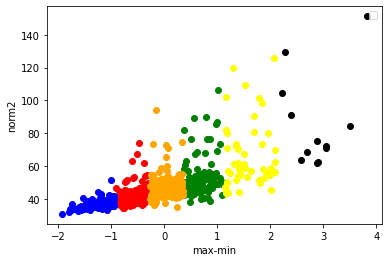

In [20]:
df1 = mealresult[mealresult.Kmeans==0]
df2 = mealresult[mealresult.Kmeans==1]
df3 = mealresult[mealresult.Kmeans==2]
df4 = mealresult[mealresult.Kmeans==3]
df5 = mealresult[mealresult.Kmeans==4]
df6 = mealresult[mealresult.Kmeans==5]
plt.scatter(df1['max-min'],df1['norm'],color='green')
plt.scatter(df2['max-min'],df2['norm'],color='red')
plt.scatter(df3['max-min'],df3['norm'],color='black')
plt.scatter(df4['max-min'],df4['norm'],color='blue')
plt.scatter(df5['max-min'],df5['norm'],color='yellow')
plt.scatter(df6['max-min'],df6['norm'],color='orange')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('max-min')
plt.ylabel('norm2')
plt.legend()

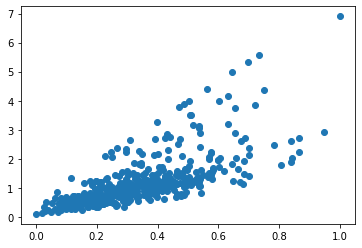

In [22]:
#KMeans custring with MinMax scaler

scaler = MinMaxScaler()

scaler.fit(mealresult[['max-min']])
mealresult['max-min'] = scaler.transform(mealresult[['max-min']])

scaler.fit(mealresult[['norm2']])
#mealresult['norm2'] = scaler.transform(mealresult[['norm2']])

plt.scatter(mealresult['max-min'],mealresult['norm2'])

In [25]:
x = np.asarray(mealresult['max-min'])
y = np.asarray(mealresult['norm2'])

km = KMeans(n_clusters=6)
y_predicted = km.fit_predict(x.reshape(-1, 1), y)
y_predicted

array([1, 1, 0, 4, 1, 2, 2, 1, 4, 0, 2, 4, 4, 2, 2, 0, 4, 2, 1, 0, 4, 1,
       4, 1, 1, 0, 1, 3, 4, 2, 3, 1, 2, 4, 4, 0, 0, 4, 2, 4, 1, 4, 1, 1,
       4, 0, 2, 1, 4, 2, 2, 1, 4, 0, 0, 4, 4, 2, 2, 0, 4, 4, 5, 0, 2, 1,
       3, 3, 0, 2, 0, 4, 2, 1, 0, 3, 2, 2, 5, 1, 2, 2, 3, 4, 0, 4, 4, 4,
       4, 1, 1, 1, 4, 1, 4, 1, 2, 3, 2, 5, 3, 2, 0, 2, 2, 0, 2, 0, 1, 1,
       1, 2, 0, 1, 4, 0, 1, 4, 3, 4, 4, 4, 2, 0, 4, 4, 0, 2, 3, 2, 4, 3,
       2, 2, 4, 0, 2, 2, 2, 0, 0, 2, 1, 2, 4, 0, 0, 2, 2, 0, 1, 2, 1, 3,
       2, 0, 2, 4, 1, 4, 1, 3, 5, 0, 1, 1, 2, 1, 0, 0, 0, 3, 2, 2, 2, 5,
       4, 1, 2, 4, 4, 1, 2, 0, 0, 3, 1, 0, 1, 3, 4, 1, 2, 2, 3, 3, 2, 3,
       2, 0, 1, 3, 1, 1, 3, 4, 2, 2, 1, 2, 2, 3, 3, 4, 0, 2, 0, 2, 4, 0,
       0, 4, 3, 0, 1, 4, 0, 4, 4, 2, 4, 2, 2, 0, 0, 0, 2, 3, 1, 4, 0, 4,
       4, 0, 0, 1, 4, 1, 2, 4, 3, 1, 4, 1, 4, 2, 2, 2, 2, 0, 4, 0, 0, 0,
       1, 4, 4, 4, 4, 4, 3, 2, 1, 2, 2, 4, 2, 4, 1, 0, 0, 4, 0, 2, 4, 2,
       2, 2, 4, 0, 4, 4, 1, 0, 2, 4, 0, 4, 0, 0, 1,

No handles with labels found to put in legend.


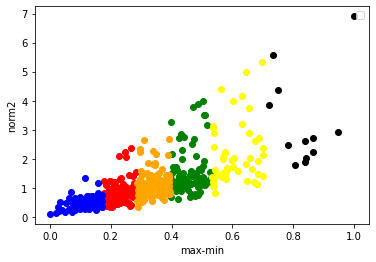

In [26]:
df1 = mealresult[mealresult.Kmeans==0]
df2 = mealresult[mealresult.Kmeans==1]
df3 = mealresult[mealresult.Kmeans==2]
df4 = mealresult[mealresult.Kmeans==3]
df5 = mealresult[mealresult.Kmeans==4]
df6 = mealresult[mealresult.Kmeans==5]
plt.scatter(df1['max-min'],df1['norm2'],color='green')
plt.scatter(df2['max-min'],df2['norm2'],color='red')
plt.scatter(df3['max-min'],df3['norm2'],color='black')
plt.scatter(df4['max-min'],df4['norm2'],color='blue')
plt.scatter(df5['max-min'],df5['norm2'],color='yellow')
plt.scatter(df6['max-min'],df6['norm2'],color='orange')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('max-min')
plt.ylabel('norm2')
plt.legend()

In [27]:
# Square error

sse = []
k_rng = range(1,6)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x.reshape(-1, 1), y)
    sse.append(km.inertia_)
    
a = np.array(sse)
k_saa = np.sum(a)

print(k_saa)   

23.598405501084585


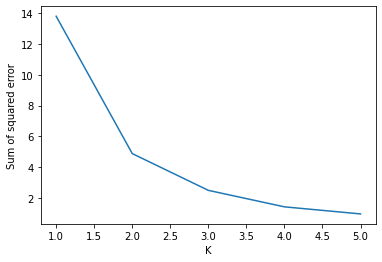

In [28]:
#Elbow method

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [29]:
#Calculating Putity, entropy and Confusion Matrix

pd_series = pd.Series(y_predicted)
counts = pd_series.value_counts()
#USE pandas.core.algorithms.value_counts() AND scipy.stats.entropy() TO CALCULATE SHANNON'S ENTROPY
k_entropy = scipy.stats.entropy(counts)

print(k_entropy)


y_true= mealresult['mlabel']
CM=sklearn.metrics.confusion_matrix(y_true, y_predicted)
print(CM)
CM_df=pd.DataFrame(CM)

min = CM_df.min(axis=1)
max = CM_df.max(axis=1)
sum =CM_df.sum(axis=1)





CM_df['max']=max
CM_df['total']=sum
k_purity=(CM_df['max'].sum()) / (CM_df['total'].sum())

print(k_purity)

1.6224548647301
[[35 20 39 11 39  4]
 [22 33 35 11 26  2]
 [14 20 36  8 25  1]
 [11 11  9  7 11  3]
 [ 3  4  6  2  4  0]
 [ 1  0  1  0  0  0]]
0.28193832599118945


In [32]:
#DBSczn clustring

df = mealresult[['norm2']]
#df = df.as_matrix().astype("float32", copy = False)
stscaler = StandardScaler().fit(df)
df = stscaler.transform(df)
#You will construct a DBSCAN object that requires a minimum of 15 data points in a neighborhood of radius 0.5 to be considered a core point.

dbsc = DBSCAN(eps = .1, min_samples = 2).fit(df)
#Next, we can extract our cluster labels and outliers to plot our results.

DB_labels = dbsc.labels_
core_samples = np.zeros_like(DB_labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [33]:
DB_labels

array([ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
        0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  5,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,
        0,  0,  0,  0,  0,  0,  0,  6, -1,  2,  0,  0,  0,  4,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  4,  0, -1,  0,  0,  0,  1,  0,  0,
        4,  0,  0,  0,  5,  0,  0,  5, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [34]:
pd_series = pd.Series(DB_labels)
counts = pd_series.value_counts()
#USE pandas.core.algorithms.value_counts() AND scipy.stats.entropy() TO CALCULATE SHANNON'S ENTROPY
DB_entropy = scipy.stats.entropy(counts)

print(DB_entropy)
y_true= mealresult['mlabel']
MSE=sklearn.metrics.mean_squared_error(mealresult['mlabel'], pd_series)
DB_see= MSE*y_true.count()
DB_see

0.40209045514934727


1625.0

In [36]:
CM=sklearn.metrics.confusion_matrix(y_true, pd_series)
print(CM)
CM_df=pd.DataFrame(CM)

min = CM_df.min(axis=1)
max = CM_df.max(axis=1)
sum =CM_df.sum(axis=1)





CM_df['max']=max
CM_df['total']=sum
DB_purity=(CM_df['max'].sum()) / (CM_df['total'].sum())

print(DB_purity)

[[  0   0   0   0   0   0   0   0   0]
 [  1 138   0   0   3   4   0   2   0]
 [  2 120   0   1   0   2   3   0   1]
 [  2  95   2   1   0   1   1   2   0]
 [  0  48   0   0   1   2   1   0   0]
 [  0  18   0   0   0   0   0   0   1]
 [  0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]]
0.9273127753303965


In [15]:
Result =[[k_saa, DB_see,k_entropy, DB_entropy,k_purity, DB_purity ]]

Result = pd.DataFrame(Result)
Result.to_csv('Result.csv',index=False, header=None)